# **Regression Models using scikit-learn**

 Predicting a continuous-valued attribute associated with an object.
## **Applications**:
Drug response, stock prices.
## **Algorithms**:
**Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regression (SVR), K-Nearest Neighbors Regressor, Elastic Net, Hybrib Approach.**

# **Linera Regression**

**Linear regression** is a statistical method for modeling the relationship between a dependent variable and one or more independent variables.

## **Key Formulas**

- **Simple Linear Regression**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept of the line.  
  - **$\beta_1$**: Slope of the line.  
  - **$x$**: Independent variable.  
  - **$\epsilon$**: Error term.  

- **Multiple Linear Regression**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept.  
  - **$\beta_1, \beta_2, \ldots, \beta_p$**: Coefficients for the independent variables.  
  - **$x_1, x_2, \ldots, x_p$**: Independent variables.  
  - **$\epsilon$**: Error term.


In [62]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error



### **Load Dataset**

In [64]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


### **Convert infinite values to NaN and then handle missing values**

In [65]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.mean())

### **Initial Data Overview with Seaborn**

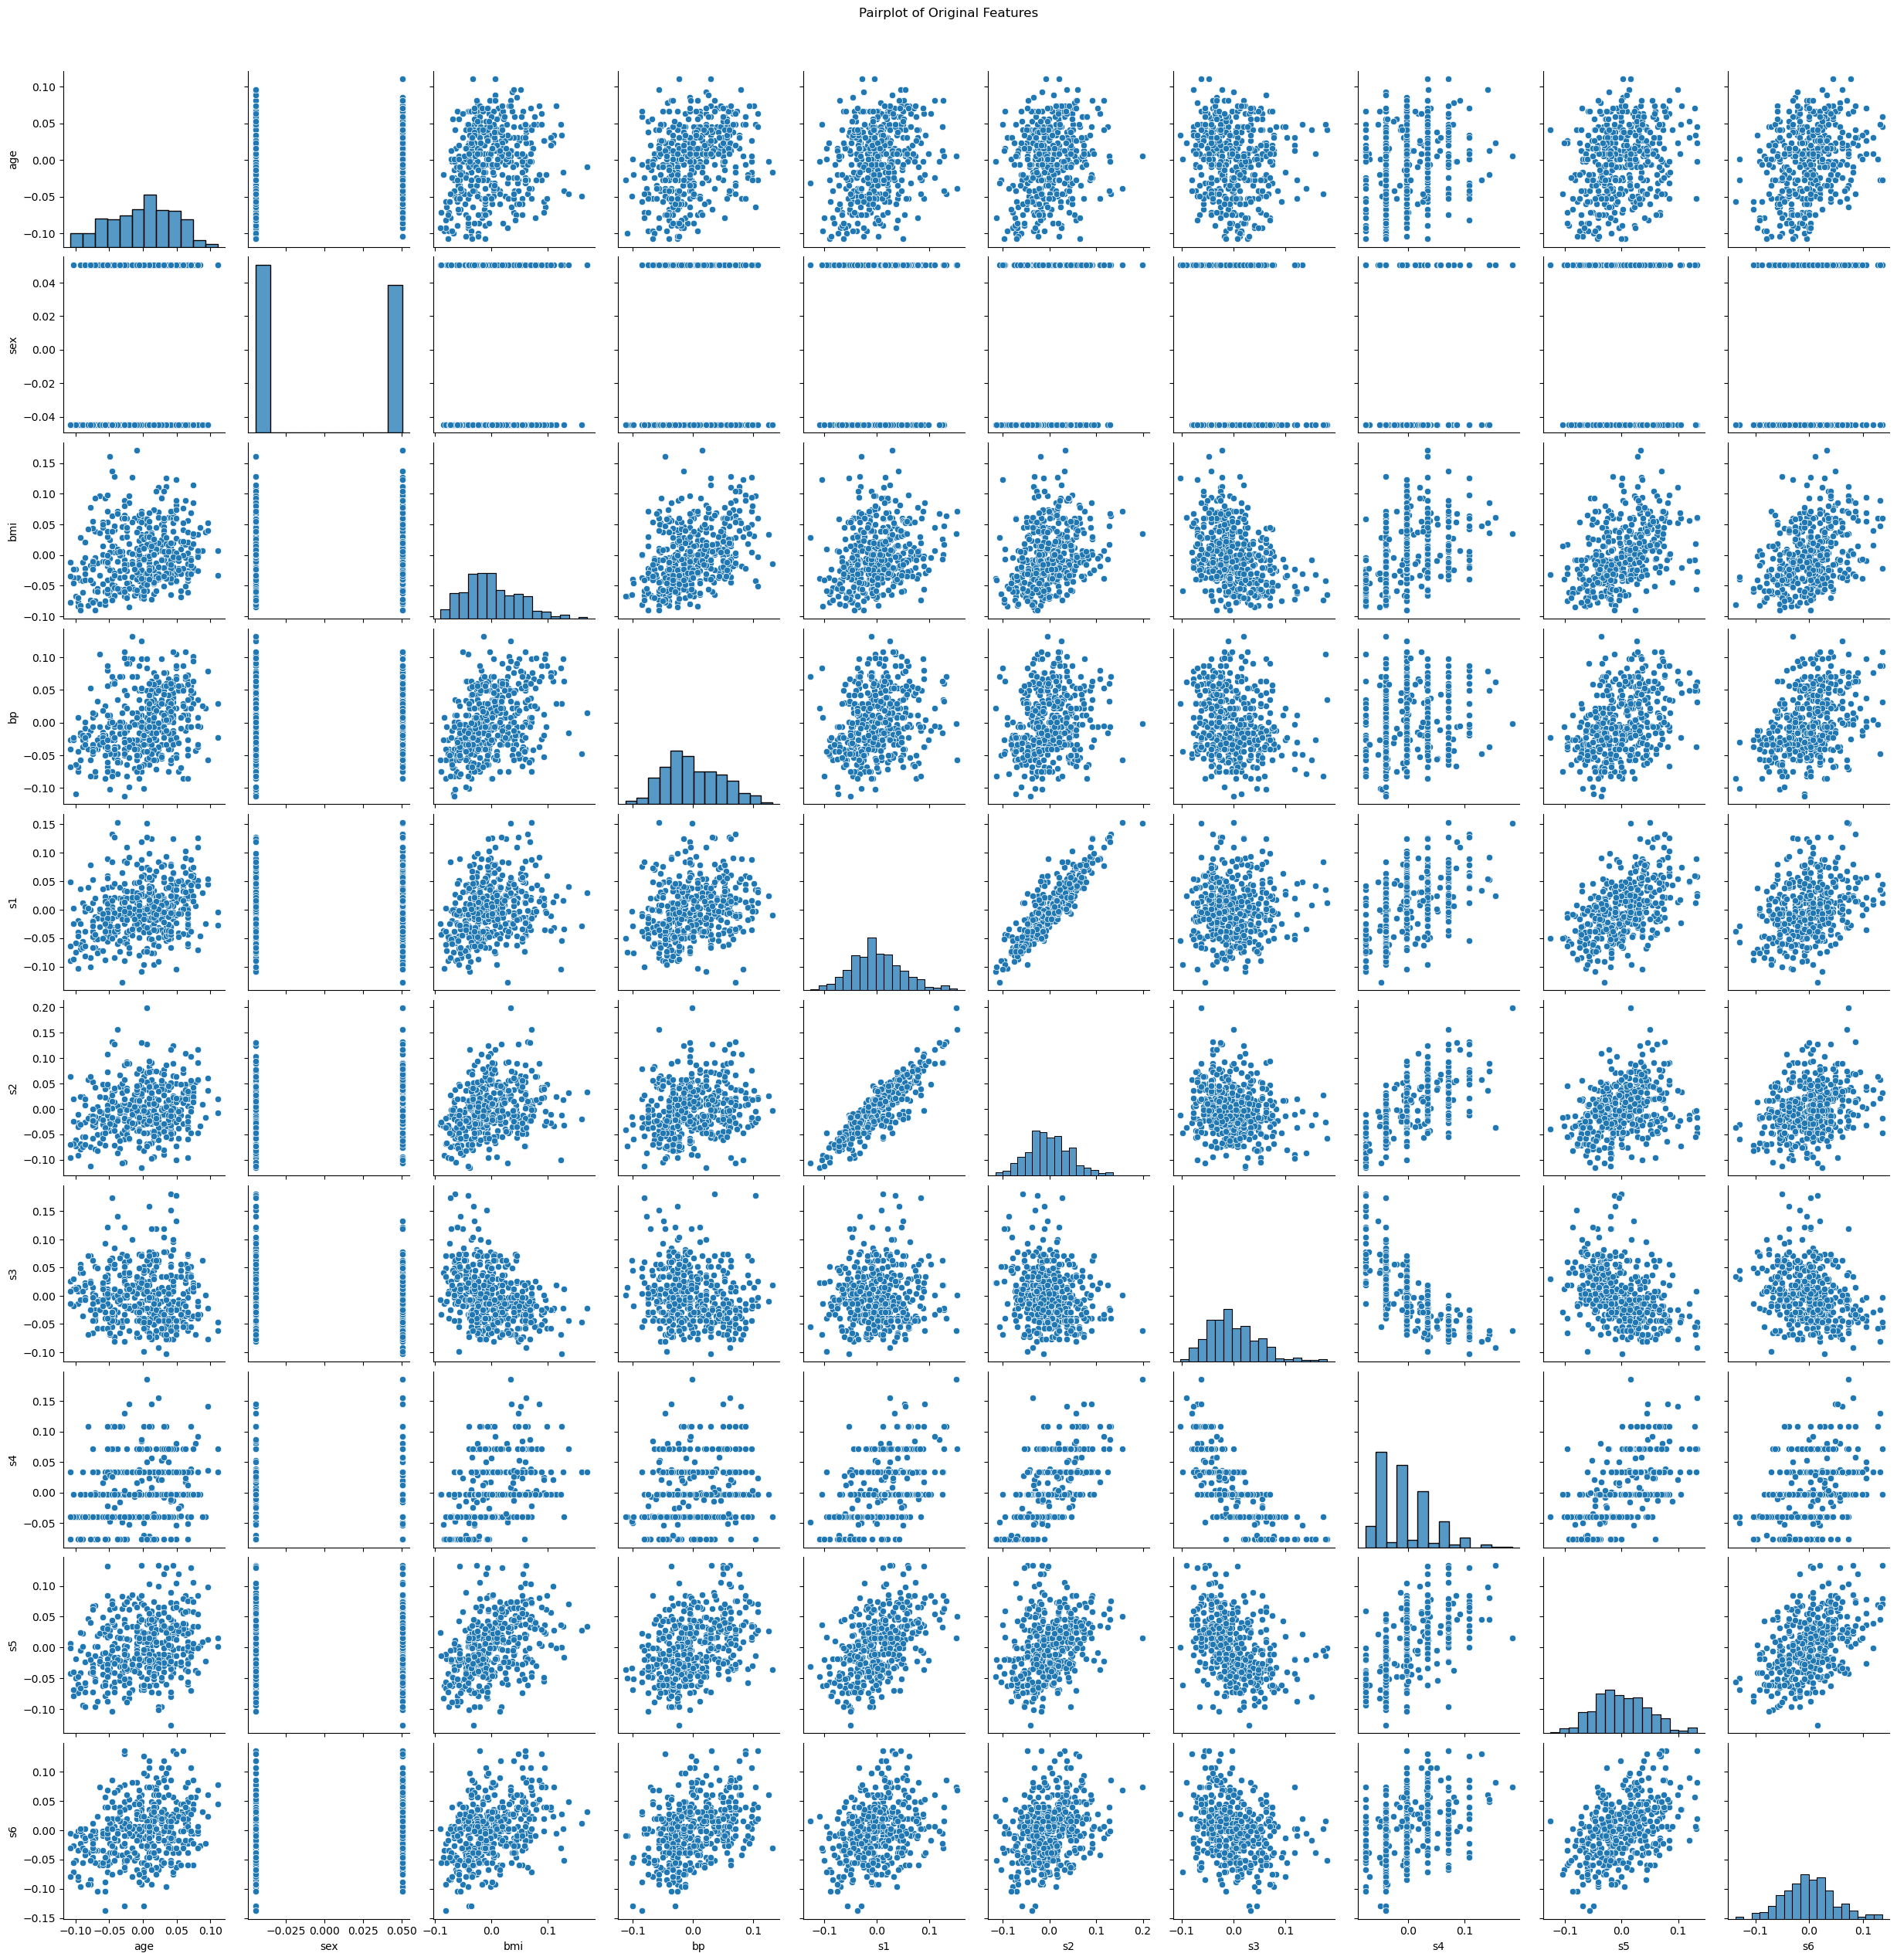

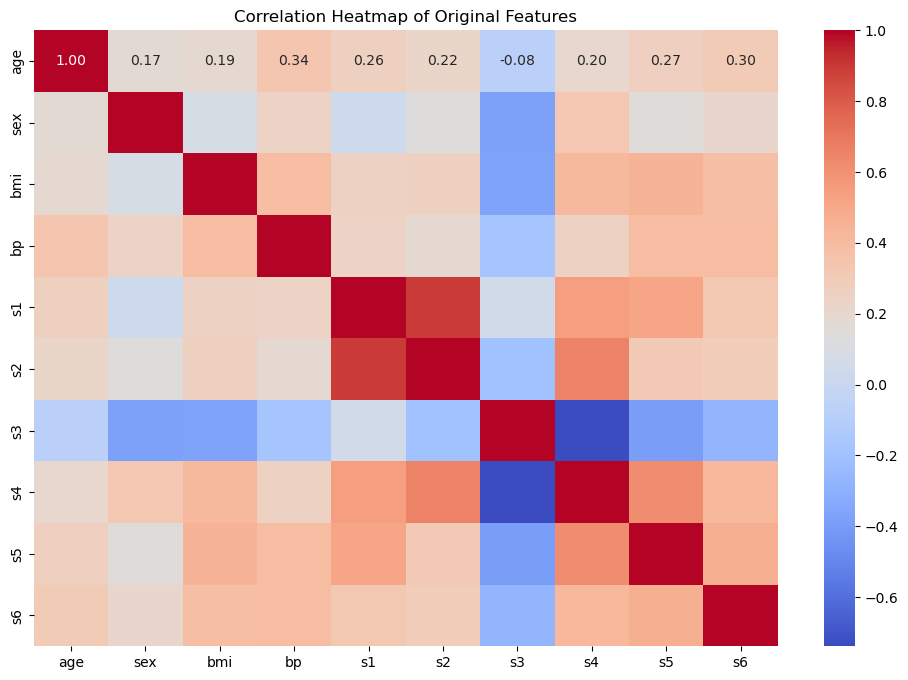

In [66]:
sns.pairplot(X)
plt.suptitle('Pairplot of Original Features', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Original Features')
plt.show()

### **Feature Engineering: Polynomial Features**

In [67]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

### **Feature Selection: RFE**

In [68]:
ridge = Ridge()
rfe = RFE(ridge, n_features_to_select=10, step=1)
rfe.fit(X_poly_df, y)

RFE(estimator=Ridge(), n_features_to_select=10)

### **Filter the DataFrame to include only selected features**

In [69]:
X_rfe = X_poly_df.iloc[:, rfe.support_]

### **Add target column to the DataFrame**

In [70]:
X_rfe_df = X_rfe.copy()
X_rfe_df['target'] = y

### **Splitting the dataset**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe_df.drop('target', axis=1), X_rfe_df['target'], test_size=0.2, random_state=42)

### **Handling Outliers: RobustScaler**

In [72]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model Training: Linear Regression**

In [73]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_y_pred = linear_reg.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_y_pred)
print("Linear Regression Mean Squared Error:", linear_reg_mse)

Linear Regression Mean Squared Error: 2866.162241199841


### **Viuslization**

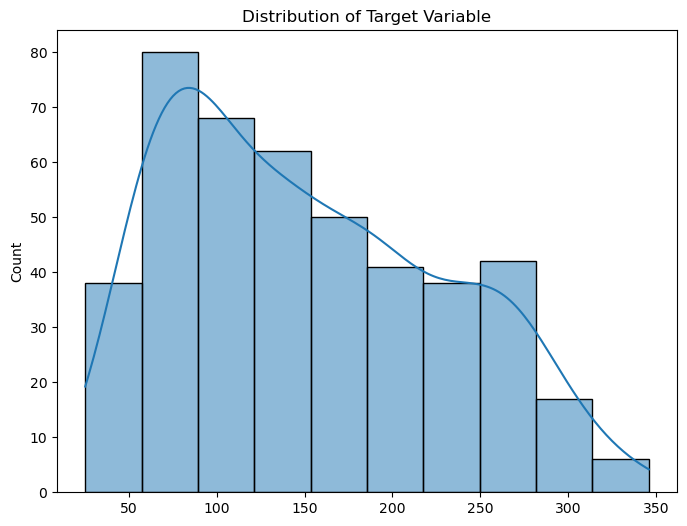

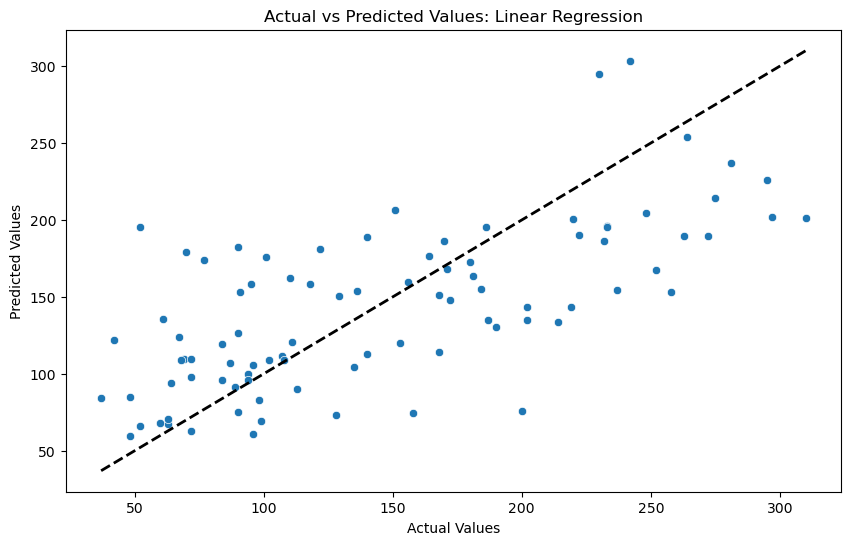

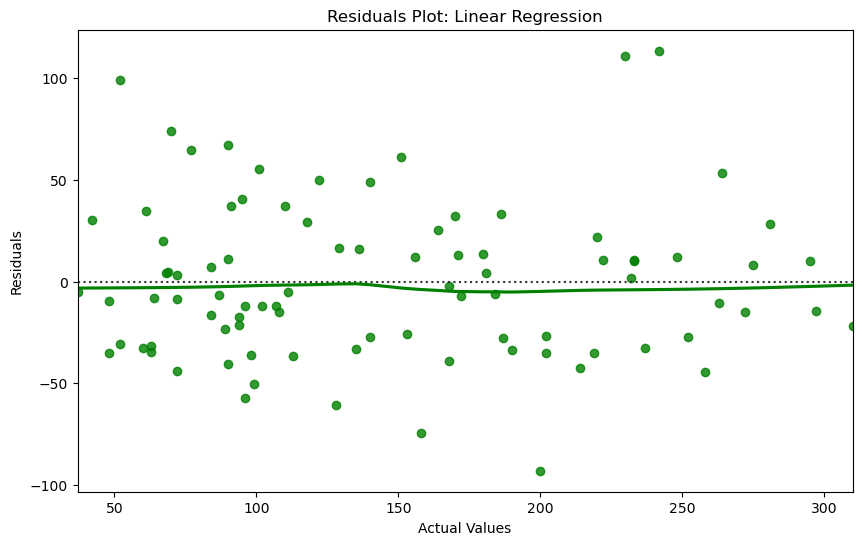

In [74]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=linear_reg_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=linear_reg_y_pred, lowess=True, color="g")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Linear Regression")
plt.show()


# **Ridge Regression**

**Ridge Regression** is a type of linear regression that includes a regularization term to address multicollinearity and prevent overfitting. The regularization term adds a penalty proportional to the sum of the squares of the coefficients.

## **Key Formula**

- **Ridge Regression Model**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept.  
  - **$\beta_1, \beta_2, \ldots, \beta_p$**: Coefficients for the independent variables.  
  - **$x_1, x_2, \ldots, x_p$**: Independent variables.  
  - **$\epsilon$**: Error term.

- **Ridge Regression Objective Function**:  
  Ridge Regression minimizes the following objective function:  
  $$
  \text{Objective} = \sum_{i=1}^{n} \left( y_i - \hat{y_i} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
  $$  
  where:  
  - **$\lambda$**: Regularization parameter (penalty term).  
  - **$\sum_{j=1}^{p} \beta_j^2$**: Sum of the squares of the coefficients.


Ridge Regression Mean Squared Error: 2865.32216247231


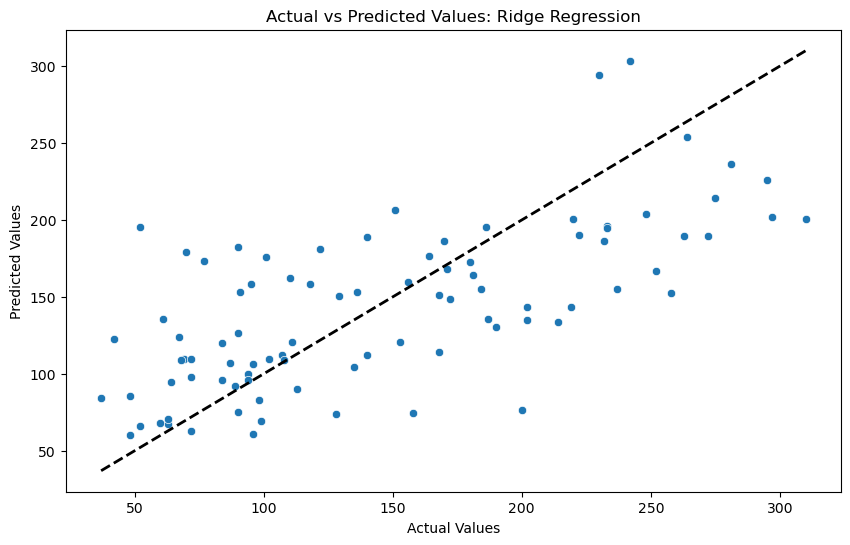

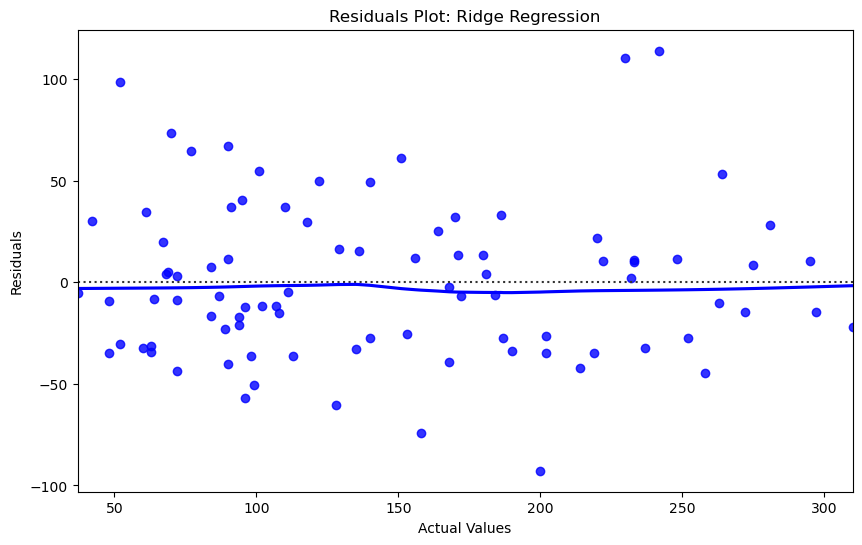

In [75]:
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_y_pred = ridge_reg.predict(X_test_scaled)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_y_pred)
print("Ridge Regression Mean Squared Error:", ridge_reg_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ridge_reg_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Ridge Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=ridge_reg_y_pred, lowess=True, color="b")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Ridge Regression")
plt.show()


# **Lasso Regression**

**Lasso Regression** (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes a regularization term to enhance the model's performance by shrinking some coefficients to zero. This technique helps in feature selection and prevents overfitting.

## **Key Formula**

- **Lasso Regression Model**:  
  The relationship is modeled as:  
  $$
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon
  $$  
  where:  
  - **$y$**: Dependent variable.  
  - **$\beta_0$**: Y-intercept.  
  - **$\beta_1, \beta_2, \ldots, \beta_p$**: Coefficients for the independent variables.  
  - **$x_1, x_2, \ldots, x_p$**: Independent variables.  
  - **$\epsilon$**: Error term.

- **Lasso Regression Objective Function**:  
  Lasso Regression minimizes the following objective function:  
  $$
  \text{Objective} = \sum_{i=1}^{n} \left( y_i - \hat{y_i} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
  $$  
  where:  
  - **$\lambda$**: Regularization parameter (penalty term).  
  - **$\sum_{j=1}^{p} |\beta_j|$**: Sum of the absolute values of the coefficients.



Lasso Regression Mean Squared Error: 2855.4214435761323


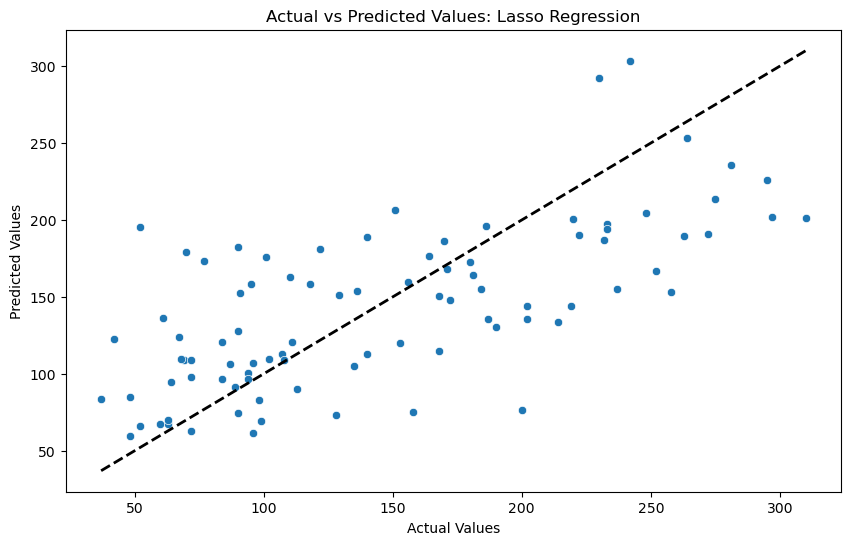

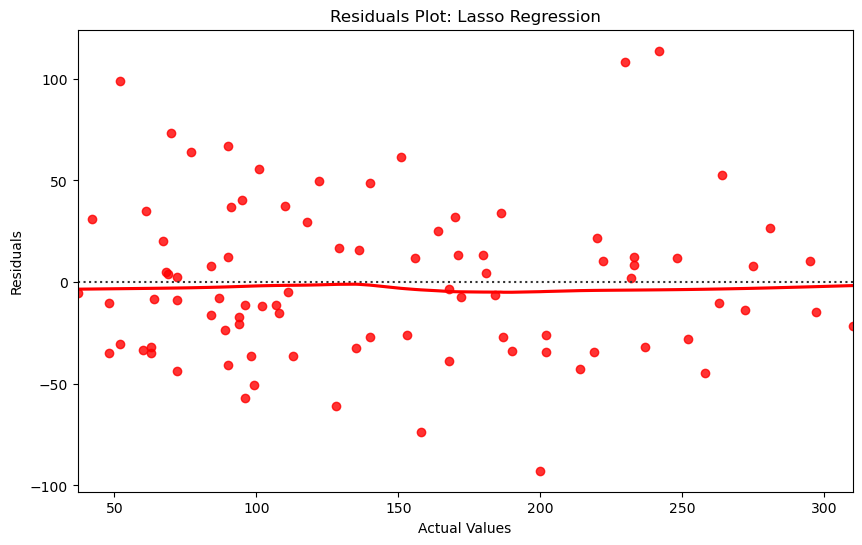

In [76]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_y_pred = lasso_reg.predict(X_test_scaled)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_y_pred)
print("Lasso Regression Mean Squared Error:", lasso_reg_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lasso_reg_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Lasso Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=lasso_reg_y_pred, lowess=True, color="r")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Lasso Regression")
plt.show()


# **Decision Tree Regressor**

**Decision Tree Regressor** is a non-linear regression algorithm that uses a tree-like model of decisions to predict a continuous target variable. It splits the data into subsets based on the value of input features, creating a tree structure where each internal node represents a decision based on one of the features.

## **Key Formula**

- **Variance Reduction**:  
  The decision to split is often based on the reduction in variance:  
  $$
  \text{Variance Reduction} = \text{Variance}_{\text{parent}} - \left( \frac{n_{\text{left}}}{n_{\text{total}}} \text{Variance}_{\text{left}} + \frac{n_{\text{right}}}{n_{\text{total}}} \text{Variance}_{\text{right}} \right)
  $$  
  where:  
  - **$\text{Variance}_{\text{parent}}$**: Variance of the target variable in the parent node.  
  - **$\text{Variance}_{\text{left}}$** and **$\text{Variance}_{\text{right}}$**: Variances in the left and right child nodes, respectively.  
  - **$n_{\text{left}}$** and **$n_{\text{right}}$**: Number of samples in the left and right child nodes, respectively.  
  - **$n_{\text{total}}$**: Total number of samples in the parent node.


Decision Tree Regression Mean Squared Error: 4375.685393258427


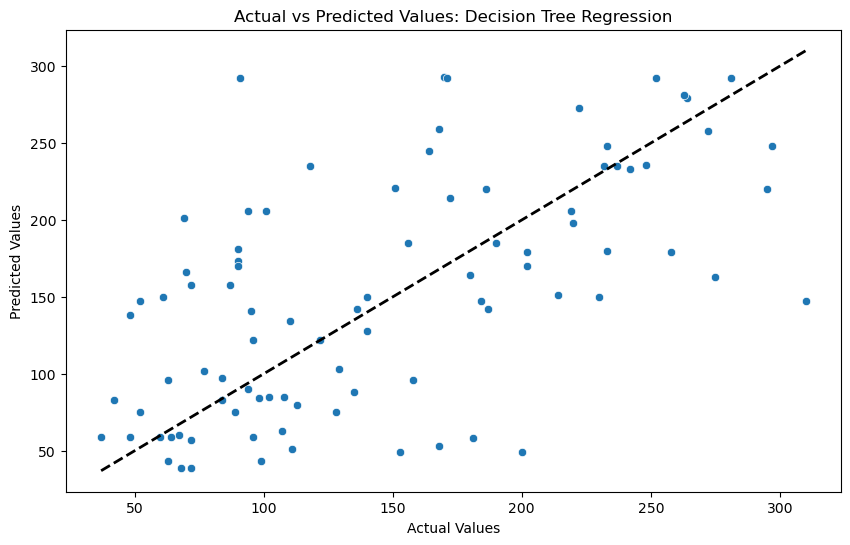

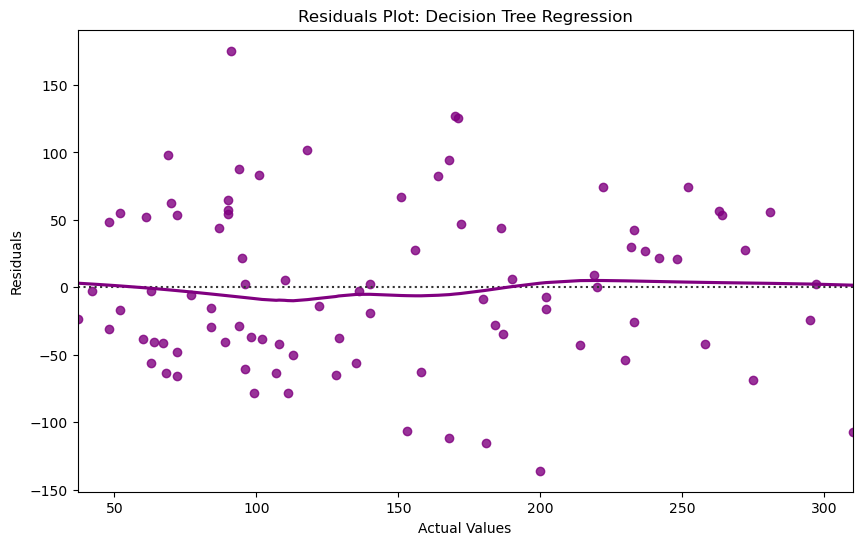

In [77]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_y_pred = decision_tree_reg.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_y_pred)
print("Decision Tree Regression Mean Squared Error:", decision_tree_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=decision_tree_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Decision Tree Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=decision_tree_y_pred, lowess=True, color="purple")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Decision Tree Regression")
plt.show()


# **Random Forest Regressor**

**Random Forest Regressor** is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and control overfitting. Each tree in the forest is trained on a random subset of the data, and the final prediction is made by averaging the predictions of all the individual trees.

## **Key Formula**

- **Prediction**:  
  The prediction of a Random Forest Regressor is the average of the predictions from all individual decision trees:  
  $$
  \hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t
  $$  
  where:  
  - **$\hat{y}$**: Final prediction.  
  - **$T$**: Number of trees in the forest.  
  - **$\hat{y}_t$**: Prediction from the $t$-th decision tree.


Random Forest Regression Mean Squared Error: 2962.1085000000003


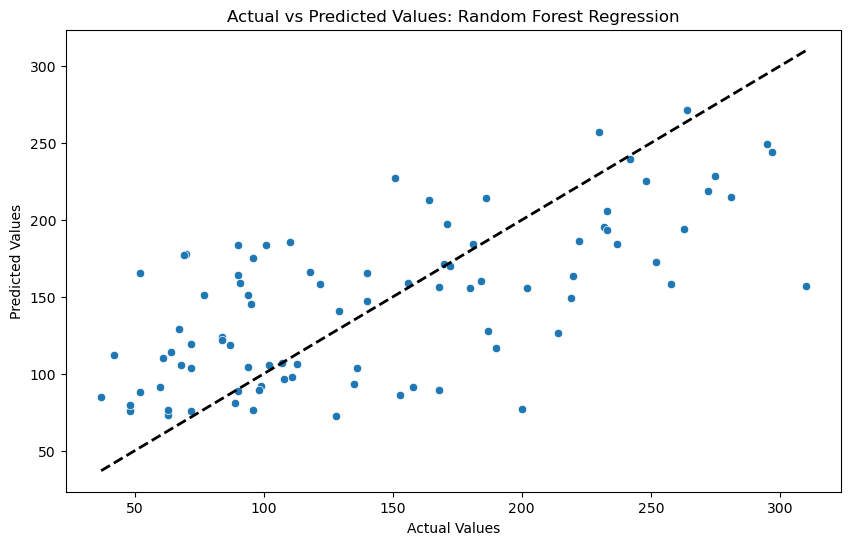

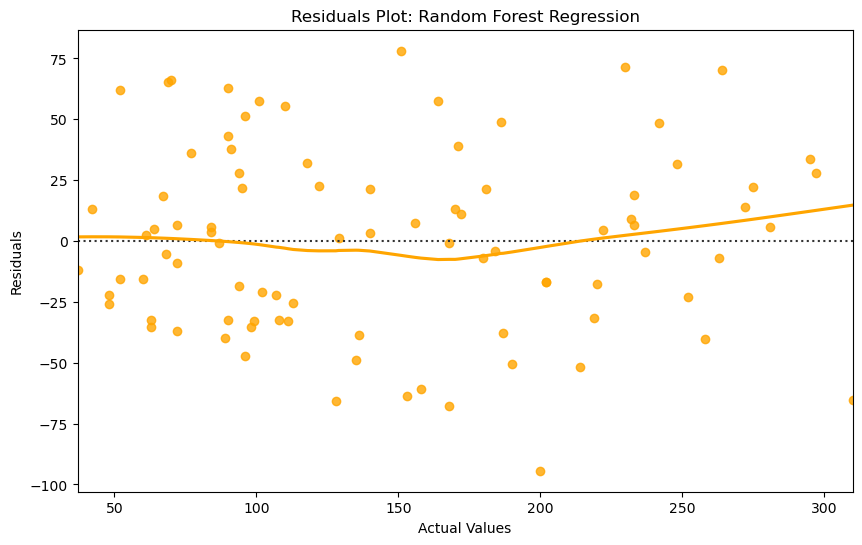

In [78]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_y_pred = random_forest_reg.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_y_pred)
print("Random Forest Regression Mean Squared Error:", random_forest_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=random_forest_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Random Forest Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=random_forest_y_pred, lowess=True, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Random Forest Regression")
plt.show()


# **Gradient Boosting Regressor**

**Gradient Boosting Regressor** is an ensemble learning technique that builds a series of models sequentially, where each model attempts to correct the errors made by the previous ones. The final prediction is a weighted sum of the predictions from all the individual models, typically decision trees.

## **Key Formula**

- **Model Update**:  
  The model updates are based on minimizing the loss function. The prediction at each step is:  
  $$
  \hat{y}_i = \hat{y}_{i-1} + \eta \cdot f_i(x)
  $$  
  where:  
  - **$\hat{y}_i$**: Prediction after adding the $i$-th model.  
  - **$\hat{y}_{i-1}$**: Prediction from the previous step.  
  - **$\eta$**: Learning rate.  
  - **$f_i(x)$**: Prediction from the $i$-th model (typically a decision tree).


Gradient Boosting Regression Mean Squared Error: 2884.4419923409478


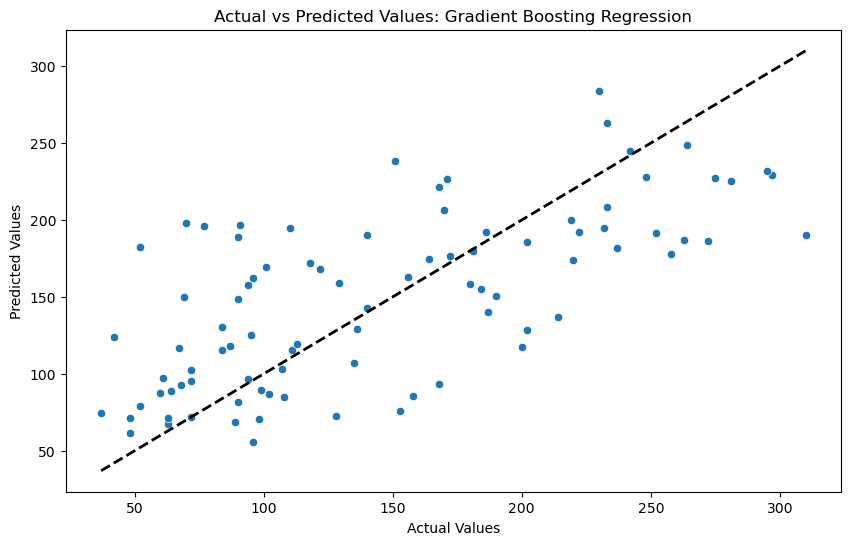

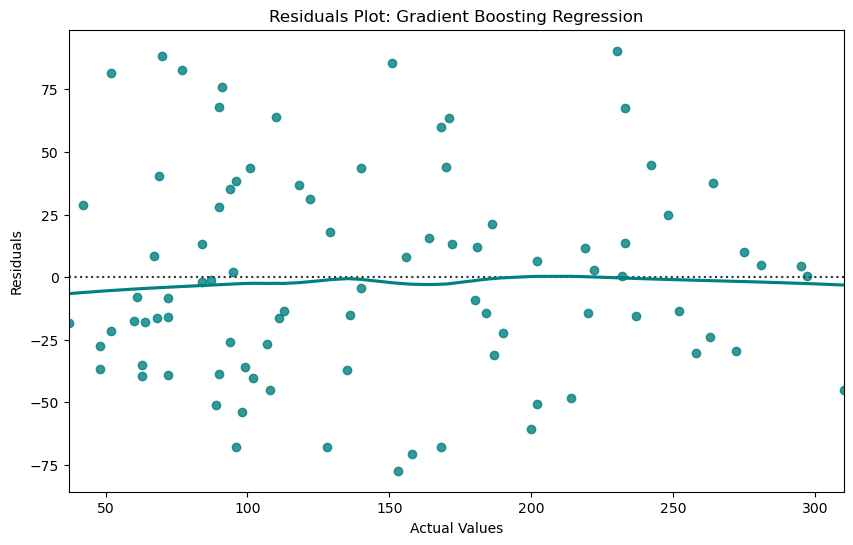

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting_reg.fit(X_train_scaled, y_train)
gradient_boosting_y_pred = gradient_boosting_reg.predict(X_test_scaled)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_y_pred)
print("Gradient Boosting Regression Mean Squared Error:", gradient_boosting_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gradient_boosting_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Gradient Boosting Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=gradient_boosting_y_pred, lowess=True, color="teal")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Gradient Boosting Regression")
plt.show()


# **Support Vector Regression (SVR)**

**Support Vector Regression (SVR)** is a type of Support Vector Machine (SVM) used for regression tasks. SVR aims to find a function that deviates from the actual observed values by a margin of tolerance, while also ensuring that the function is as flat as possible.

## **Key Formula**

- **SVR Model**:  
  The regression function is defined as:  
  $$
  f(x) = \langle w, x \rangle + b
  $$  
  where:  
  - **$\langle w, x \rangle$**: Dot product between the weight vector **$w$** and the input vector **$x$**.  
  - **$b$**: Bias term.


Support Vector Regression Mean Squared Error: 4336.602135644575


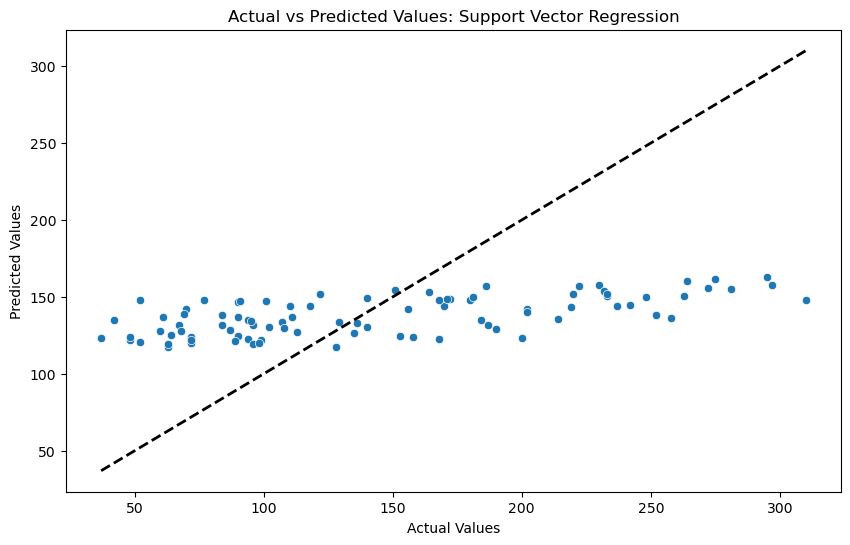

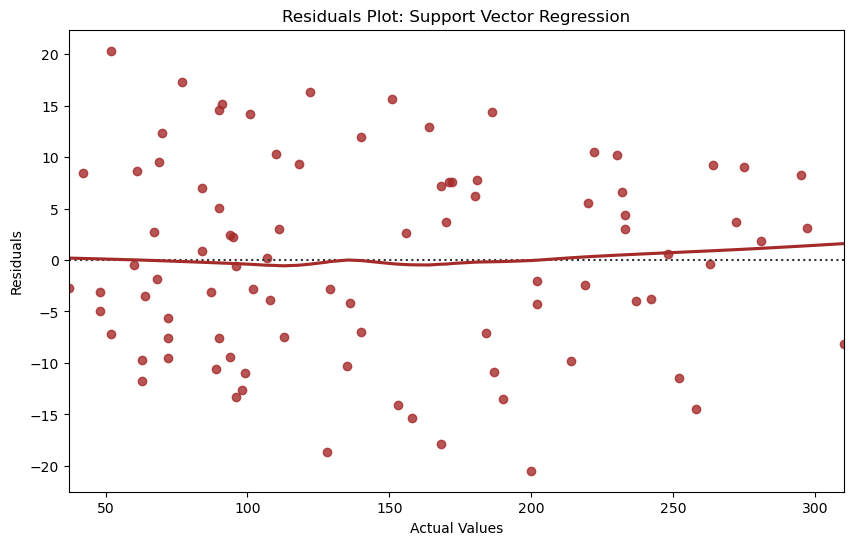

In [80]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_train_scaled, y_train)
svr_y_pred = svr_reg.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_y_pred)
print("Support Vector Regression Mean Squared Error:", svr_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=svr_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Support Vector Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=svr_y_pred, lowess=True, color="brown")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Support Vector Regression")
plt.show()


# **K-Nearest Neighbors Regressor**

**K-Nearest Neighbors Regressor** (KNN Regressor) is a non-parametric, instance-based learning algorithm used for regression tasks. It predicts the value of a target variable based on the values of its $k$ nearest neighbors in the feature space.

## **Key Formulas**

- **Distance Calculation**:  
  For two points $x$ and $x'$, the Euclidean distance is calculated as:  
  $$
  d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x_i')^2}
  $$  
  where:  
  - **$x_i$** and **$x_i'$** are the feature values of the points.  
  - **$n$** is the number of features.

- **Prediction**:  
  For a new input $x$, the prediction $\hat{y}(x)$ is the average of the target values of the $k$ nearest neighbors:  
  $$
  \hat{y}(x) = \frac{1}{k} \sum_{i=1}^{k} y_{i}
  $$  
  where:  
  - **$y_i$** are the target values of the $k$ nearest neighbors.  
  - **$k$** is the number of nearest neighbors.

- **Weighted Average Prediction**:  
  Alternatively, predictions can be weighted by the inverse of their distance:  
  $$
  \hat{y}(x) = \frac{\sum_{i=1}^{k} \frac{y_{i}}{d(x, x_{i})}}{\sum_{i=1}^{k} \frac{1}{d(x, x_{i})}}
  $$  
  where:  
  - **$d(x, x_{i})$** is the distance between $x$ and the $i$-th neighbor.


K-Nearest Neighbors Regression Mean Squared Error: 3165.0665168539326


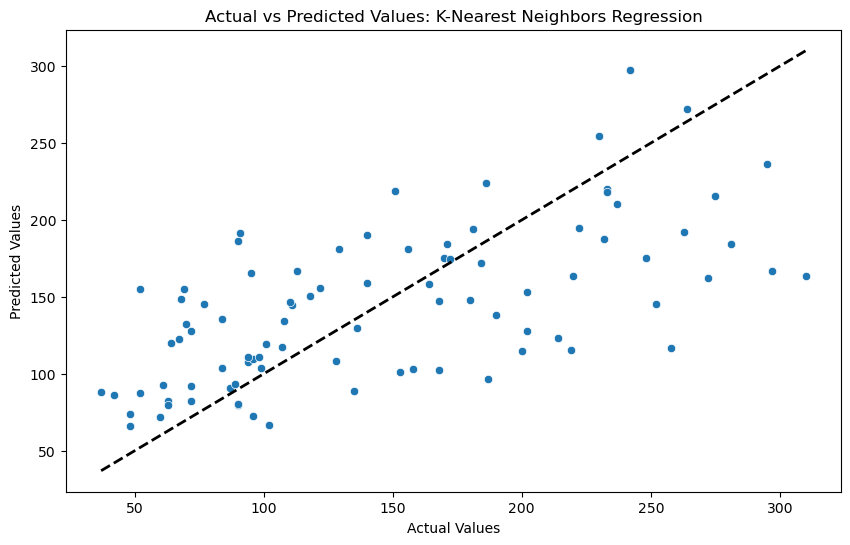

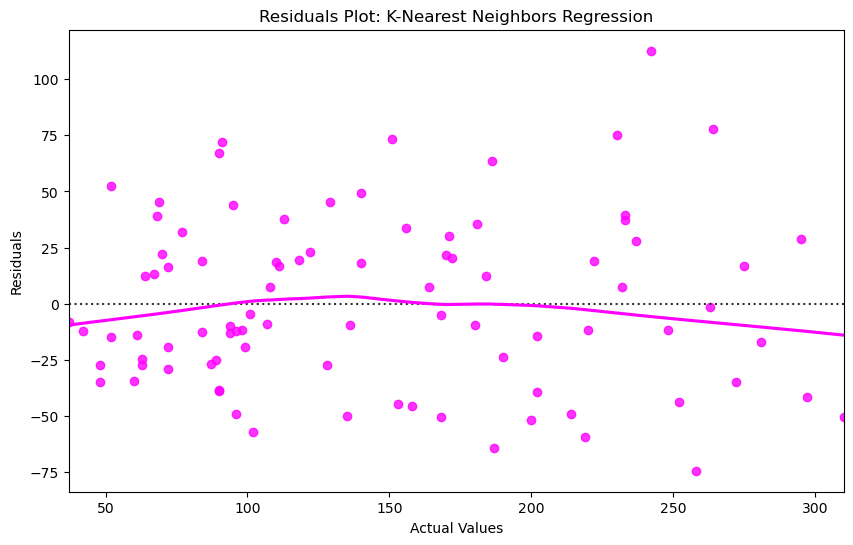

In [81]:
from sklearn.neighbors import KNeighborsRegressor


knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_reg.fit(X_train_scaled, y_train)
knn_y_pred = knn_reg.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_y_pred)
print("K-Nearest Neighbors Regression Mean Squared Error:", knn_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=knn_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: K-Nearest Neighbors Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=knn_y_pred, lowess=True, color="magenta")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: K-Nearest Neighbors Regression")
plt.show()


# **Elastic Net**

**Elastic Net** is a regularization and variable selection method that combines the penalties of both Lasso (L1 regularization) and Ridge (L2 regularization) regression. It is particularly useful when there are multiple features correlated with each other.

## **Key Formulas**

- **Elastic Net Objective Function**:  
  The objective function for Elastic Net is:  
  $$
  \text{Objective} = \frac{1}{2n} \|y - Xw\|^2_2 + \alpha \left( \frac{1 - \rho}{2} \|w\|_2^2 + \rho \|w\|_1 \right)
  $$  
  where:  
  - **$y$**: Target vector.  
  - **$X$**: Feature matrix.  
  - **$w$**: Vector of coefficients.  
  - **$n$**: Number of samples.  
  - **$\alpha$**: Regularization strength.  
  - **$\rho$**: Mixing parameter between L1 and L2 regularization.

- **Prediction**:  
  The prediction for a new input $x$ is:  
  $$
  \hat{y} = x^T w
  $$  
  where:  
  - **$\hat{y}$**: Predicted value.  
  - **$x$**: Input feature vector.  
  - **$w$**: Vector of coefficients.


Elastic Net Regression Mean Squared Error: 2863.3670103742397


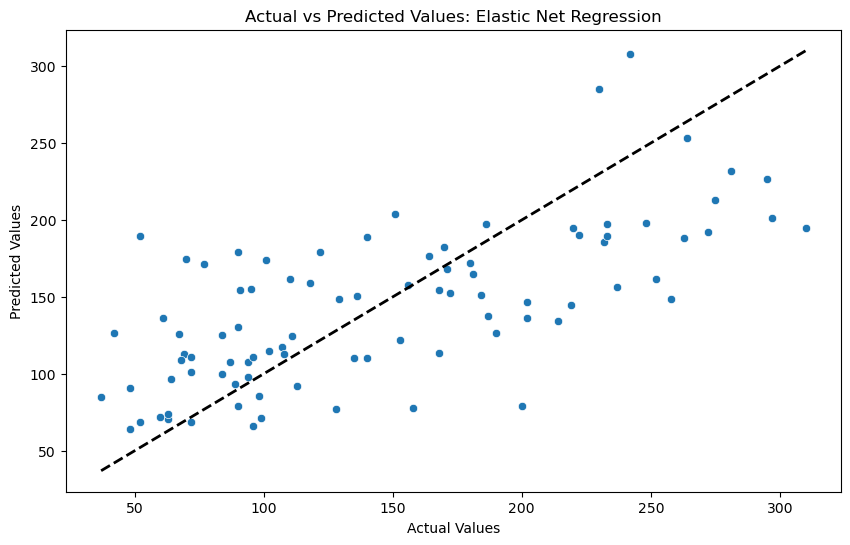

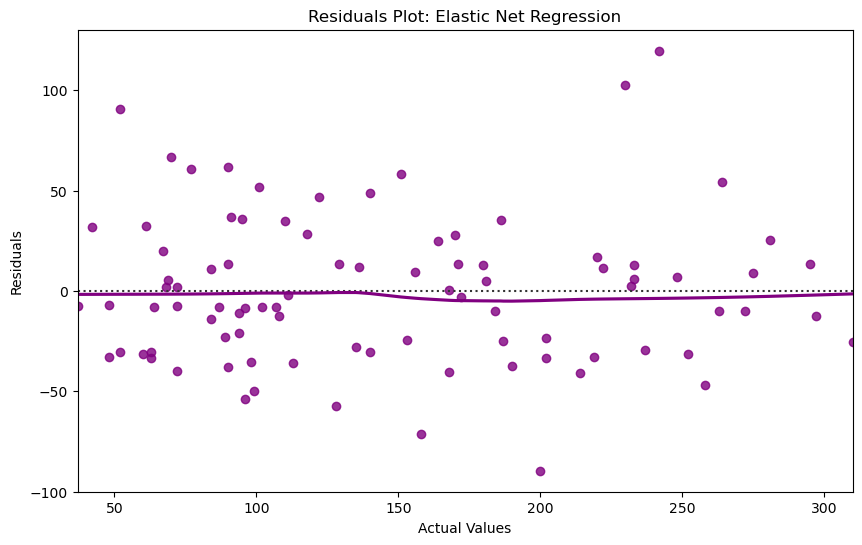

In [82]:
from sklearn.linear_model import ElasticNet


elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha controls the regularization strength, l1_ratio controls the mix of L1 and L2 regularization
elastic_net_reg.fit(X_train_scaled, y_train)
elastic_net_y_pred = elastic_net_reg.predict(X_test_scaled)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
print("Elastic Net Regression Mean Squared Error:", elastic_net_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=elastic_net_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Elastic Net Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=elastic_net_y_pred, lowess=True, color="purple")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Elastic Net Regression")
plt.show()


# **Decision Tree Regressor**

**Decision Tree Regressor** is a machine learning algorithm used for regression tasks. It builds a model in the form of a tree structure where each internal node represents a decision based on a feature, each branch represents an outcome of that decision, and each leaf node represents a predicted value.

## **Key Formulas**

- **Mean Squared Error (MSE)**:  
  The criterion for splitting nodes in a decision tree is often based on minimizing the MSE:  
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
  $$  
  where:  
  - **$y_i$**: Actual value of the $i$-th sample.  
  - **$\hat{y}$**: Predicted value for that sample.  
  - **$n$**: Number of samples.

- **Prediction**:  
  The prediction for a new input $x$ is the average of the target values in the corresponding leaf node:  
  $$
  \hat{y} = \frac{1}{n_{\text{leaf}}} \sum_{i=1}^{n_{\text{leaf}}} y_i
  $$  
  where:  
  - **$n_{\text{leaf}}$**: Number of samples in the leaf node.  
  - **$y_i$**: Target values of the samples in the leaf node.


Decision Tree Regression Mean Squared Error: 4375.685393258427


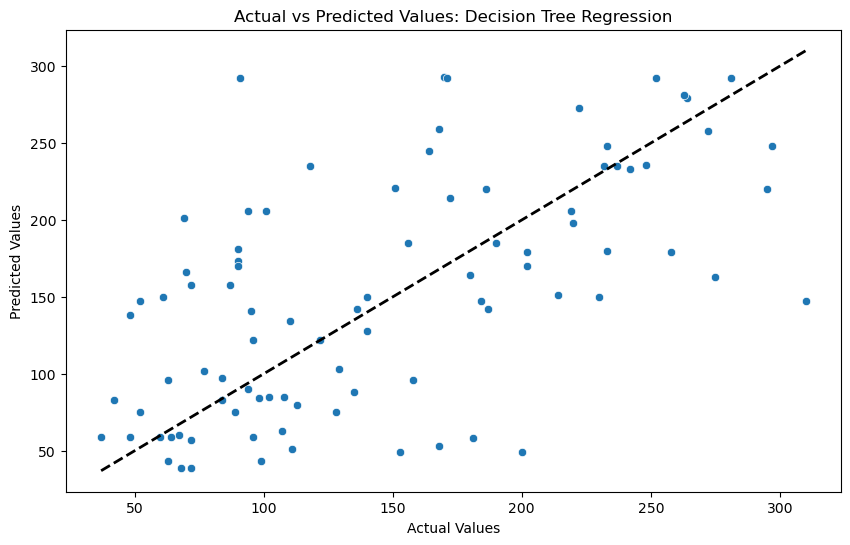

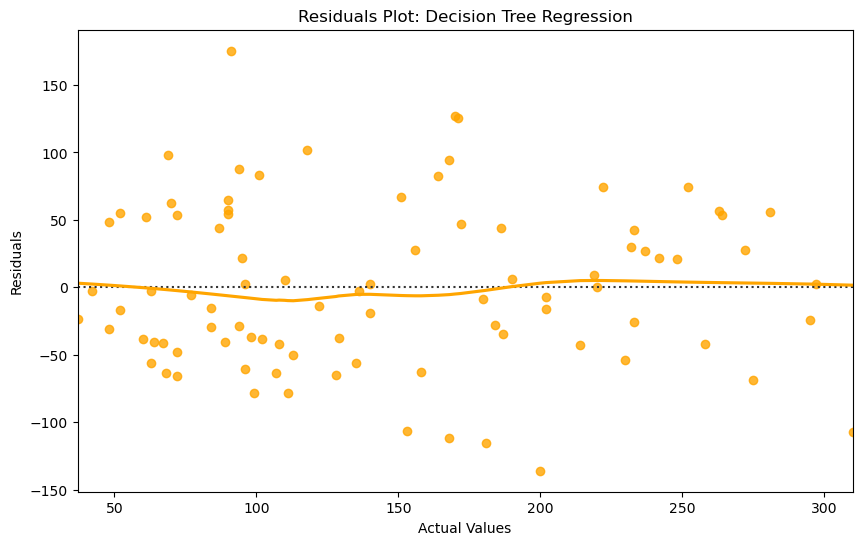

In [83]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_y_pred = decision_tree_reg.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_y_pred)
print("Decision Tree Regression Mean Squared Error:", decision_tree_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=decision_tree_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Decision Tree Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=decision_tree_y_pred, lowess=True, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Decision Tree Regression")
plt.show()


# **Hybrib Approach**

Stacking Regressor Mean Squared Error: 2746.4630387079924


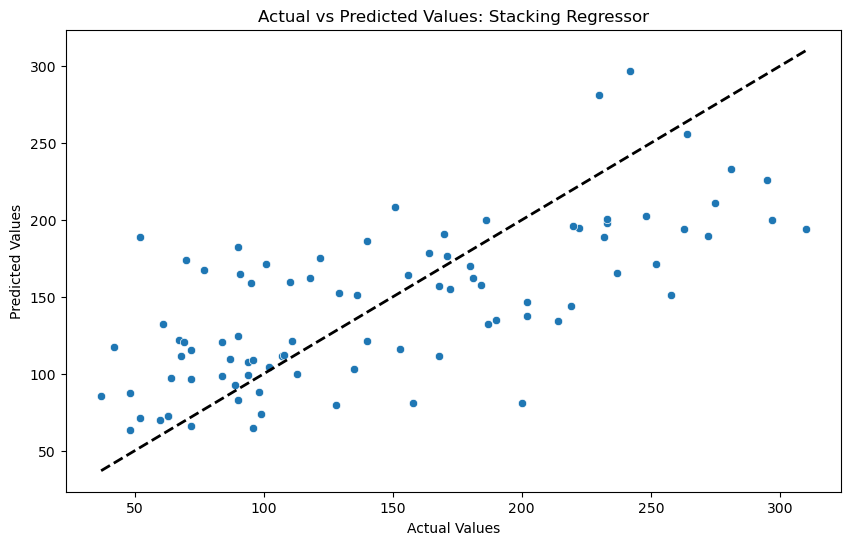

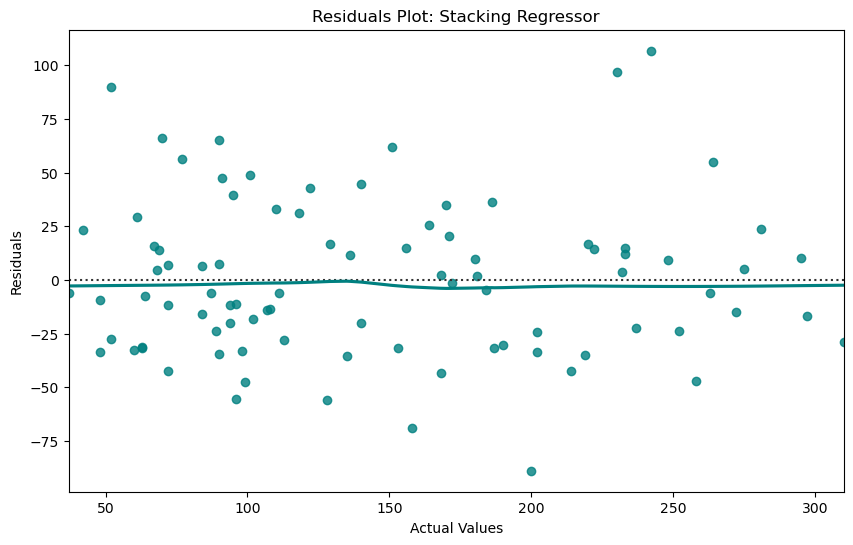

In [84]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# base models
base_models = [
    ('linear', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
]

# final model
final_model = LinearRegression()

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=final_model)


stacking_regressor.fit(X_train_scaled, y_train)
stacking_y_pred = stacking_regressor.predict(X_test_scaled)
stacking_mse = mean_squared_error(y_test, stacking_y_pred)
print("Stacking Regressor Mean Squared Error:", stacking_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=stacking_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Stacking Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=stacking_y_pred, lowess=True, color="teal")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Stacking Regressor")
plt.show()


### **Another Hybrib approach**

Voting Regressor Mean Squared Error: 2600.3513735505153


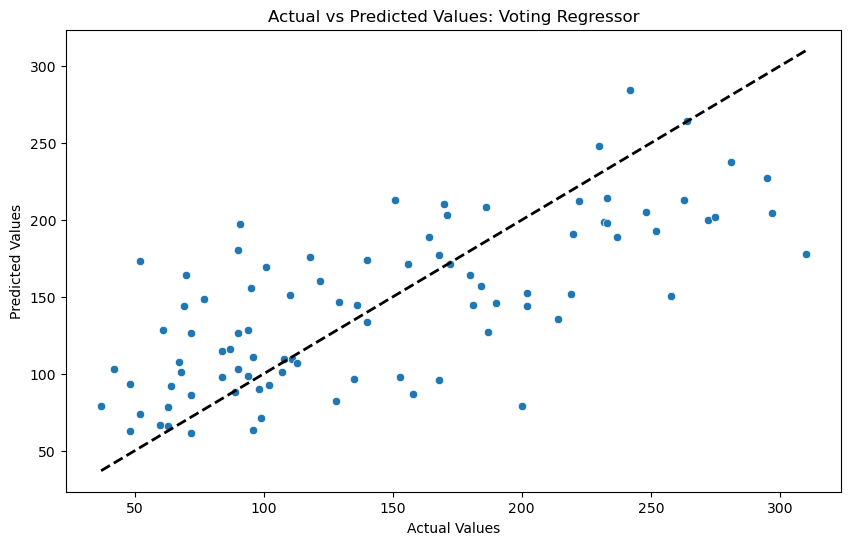

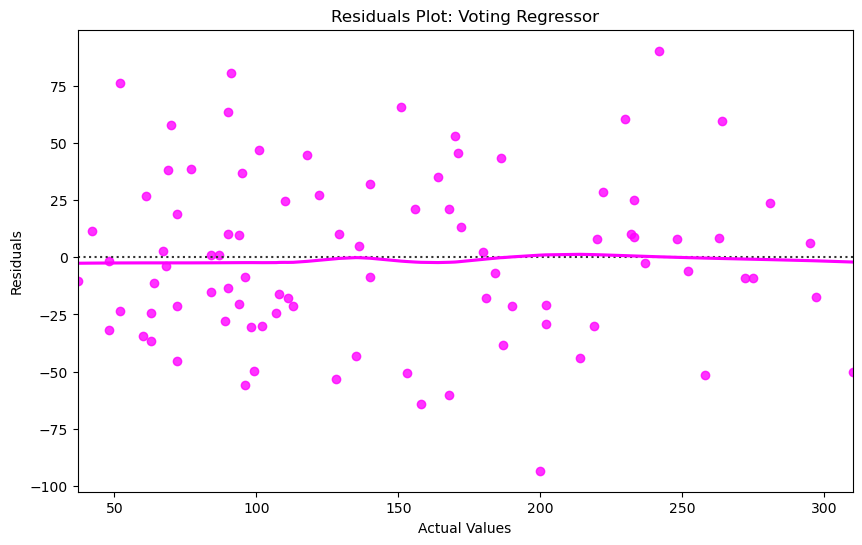

In [85]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
knn_reg = KNeighborsRegressor(n_neighbors=5)
decision_tree_reg = DecisionTreeRegressor(random_state=42)

voting_regressor = VotingRegressor(estimators=[
    ('linear', linear_reg),
    ('ridge', ridge_reg),
    ('knn', knn_reg),
    ('decision_tree', decision_tree_reg)
])

voting_regressor.fit(X_train_scaled, y_train)
voting_y_pred = voting_regressor.predict(X_test_scaled)
voting_mse = mean_squared_error(y_test, voting_y_pred)
print("Voting Regressor Mean Squared Error:", voting_mse)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=voting_y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Voting Regressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=voting_y_pred, lowess=True, color="magenta")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot: Voting Regressor")
plt.show()
